# Rela√ß√µes entre caracter√≠sticas

Uma parte importante da an√°lise de dados √© compreender as rela√ß√µes existentes entre as caracter√≠sticas do seu conjunto de dados. A partir dessas rela√ß√µes, podemos eventualmente identificar caracter√≠sticas redundantes, o que nos permite trabalhar com um conjunto menor de caracter√≠sticas selecionadas de forma a preservar a parte mais importante da informa√ß√£o existente em nosso conjunto de dados. 

Os principais tipos de rela√ß√£o entre caracter√≠sticas que investigamos em nossos dados s√£o covari√¢ncia, correla√ß√£o, causalidade e condicionalidade.

## Covari√¢ncia e correla√ß√£o

A covari√¢ncia √© um conceito estat√≠stico que avalia o comportamento de uma caracter√≠stica em fun√ß√£o de outra. Podemos observar tr√™s tipos de correla√ß√£o:
* **Positiva**: representa uma rela√ß√£o de proporcionalidade direta entre as caracter√≠sticas. Em outras palavras, o aumento no valor de uma caracter√≠stica implica no aumento no valor da outra caracter√≠stica. 
* **Negativa**: representa uma rela√ß√£o de proporcionalidade inversa entre as caracter√≠sticas. Em outras palavras, o aumento no valor de uma caracter√≠stica implica na redu√ß√£o do valor da outra caracter√≠stica. 
* **Nula**: representa uma aus√™ncia de rela√ß√£o entre as caracter√≠sticas. Em outras palavras, mudan√ßas em uma caracter√≠stica n√£o produzem um padr√£o claro de mudan√ßa em outra caracter√≠stica.

Em geral, usamos a covari√¢ncia para analisar a correla√ß√£o entre um ou mais pares de caracter√≠sticas. Enquanto a covari√¢ncia nos informa se existe uma rela√ß√£o entre as caracter√≠sticas, a correla√ß√£o quantifica essa rela√ß√£o. Podemos analisar a correla√ß√£o entre os dados fazendo uso de recursos gr√°ficos e anal√≠ticos.

### Entre um par de caracter√≠sticas

Podemos analisar a correla√ß√£o entre um par de caracter√≠sticas graficamente, atrav√©s de um **gr√°fico de dispers√£o**, ou analiticamente, atrav√©s de diferentes **m√©tricas de correla√ß√£o**.

#### Gr√°fico de dispers√£o

Nesse tipo de gr√°fico, os dados s√£o apresentados como pontos em um plano cartesiano, onde cada eixo representa uma caracter√≠stica que se deseja comparar.  A correla√ß√£o entre as caracter√≠sticas √© avaliada em fun√ß√£o do padr√£o que se apresente. Pra ver um exemplo concreto, vamos usar os dados estimados das medianas da altura e peso do Brasil fornecidas pelo IBGE, divididas por faixas et√°rias.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
peso_altura = pd.read_csv("https://raw.githubusercontent.com/leobezerra/pandas-zero/master/datasets/ibge-peso-altura-brasil.csv", sep=";", decimal=",")
peso_altura.head()

Idade  Altura  Peso
0  Menos de 1 ano    67.0   8.1
1           1 ano    81.5  11.5
2          2 anos    92.0  13.9
3          3 anos    98.9  16.0
4          4 anos   106.2  18.0

Quando um par de caracter√≠sticas apresenta covari√¢ncia **positiva**, observamos uma tend√™ncia com inclina√ß√£o positiva. Esse √© o padr√£o esperado para a rela√ß√£o entre as caracter√≠sticas `"Altura"` e `"Peso"`, que podemos verificar com o m√©todo `regplot` da biblioteca `seaborn`:

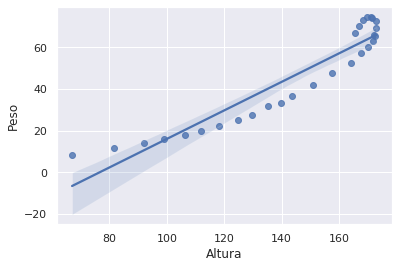

In [3]:
sns.regplot(x="Altura", y="Peso", data=peso_altura)
plt.show()

Note que o gr√°fico acima parece apresentar a mistura de dois padr√µes. Para a regi√£o onde o peso √© menor que 65kg, h√° uma covari√¢ncia positiva entre as caracter√≠sticas analisadas (reta de tend√™ncia com inclina√ß√£o positiva):

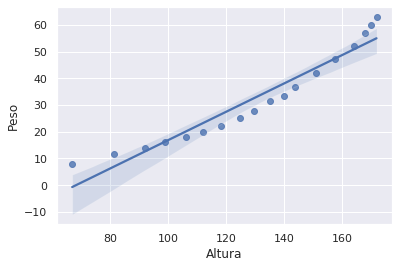

In [4]:
peso_ate_65 = peso_altura.query("Peso < 65")
sns.regplot(x="Altura", y="Peso", data=peso_ate_65)
plt.show()

J√° para a regi√£o onde o peso √© maior que 65kg, n√£o h√° padr√£o formado, o que caracteriza uma **covari√¢ncia nula** (reta de tend√™ncia paralela a um dos eixos):

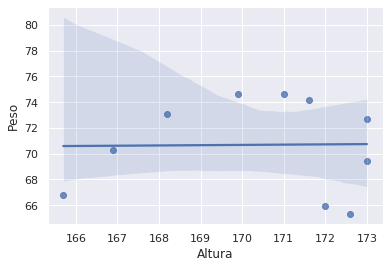

In [5]:
peso_maior_que_65 = peso_altura.query("Peso > 65")
sns.regplot(x="Altura", y="Peso", data=peso_maior_que_65)
plt.show()

Esse resultado faz sentido quando avaliamos que, em geral, medianas de peso at√© 65kg representam crian√ßas e adolescentes em idade escolar, onde h√° uma forte rela√ß√£o entre a altura e o ganho de peso:

In [6]:
peso_ate_65["Idade"].unique()

array(['Menos de 1 ano', '1 ano', '2 anos', '3 anos', '4 anos', '5 anos',
       '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos',
       '12 anos', '13 anos', '14 anos', '15 anos', '16 anos', '17 anos'],
      dtype=object)

J√° para medianas de peso maiores que 65kg, estamos falando sobre adolescentes em idade universit√°ria, adultos e idosos, onde n√£o h√° uma rela√ß√£o direta entre altura e peso:

In [7]:
peso_maior_que_65["Idade"].unique()

array(['18 anos', '19 anos', '20 a 24 anos', '25 a 29 anos',
       '30 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos',
       '65 a 74 anos', '75 anos ou mais'], dtype=object)

Para finalizar, quando um par de caracter√≠sticas apresenta covari√¢ncia **negativa**, observamos uma tend√™ncia com inclina√ß√£o negativa. Podemos gerar uma nova caracter√≠stica chamada de `"Faltam para 100kg"` a partir da caracter√≠stica `"Peso"`:

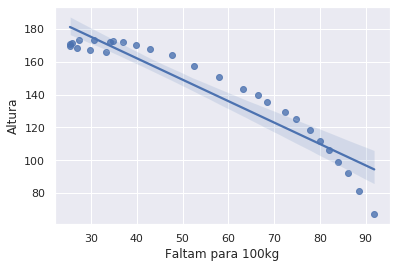

In [8]:
peso_altura["Faltam para 100kg"] = 100 - peso_altura["Peso"]
sns.regplot(x="Faltam para 100kg", y="Altura", data=peso_altura)
plt.show()

Note que a cria√ß√£o dessa nova caracter√≠stica n√£o afetou a exist√™ncia de dois padr√µes observada para a caracter√≠stica original. 

#### M√©tricas de correla√ß√£o

As m√©tricas de correla√ß√£o mais comuns s√£o as m√©tricas de **Pearson** e de **Spearman**, que avaliam a ader√™ncia dos pontos √† tend√™ncia observada. Para a correla√ß√£o de Pearson, utilizamos como tend√™ncia uma reta, como nos gr√°fico produzidos com o `regplot`. Os dados avaliados a seguir apresentam boa ader√™ncia √† reta de tend√™ncia, o que √© capturado pela correla√ß√£o de Pearson como um valor pr√≥ximo a 1:

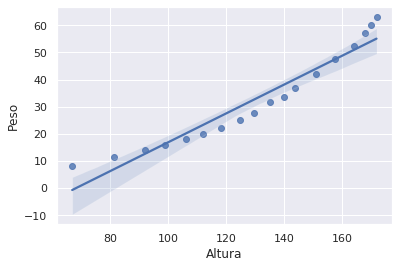

In [10]:
sns.regplot(x=peso_ate_65["Altura"], y=peso_ate_65["Peso"])
plt.show()

In [9]:
peso_ate_65[["Altura","Peso"]].corr()

Altura      Peso
Altura  1.000000  0.965415
Peso    0.965415  1.000000

Para o caso de correla√ß√£o negativa, temos que uma correla√ß√£o forte √© avaliada como valores pr√≥ximos a -1:

In [11]:
peso_ate_65["Faltam para 100kg"] = 100 - peso_ate_65["Peso"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


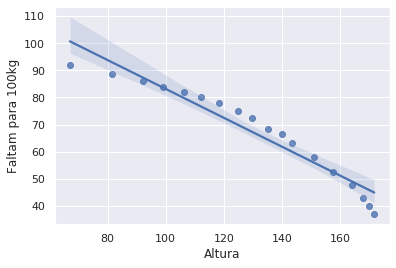

In [13]:
sns.regplot(x=peso_ate_65["Altura"], y=peso_ate_65["Faltam para 100kg"])
plt.show()

In [12]:
peso_ate_65[["Altura","Faltam para 100kg"]].corr()

Altura  Faltam para 100kg
Altura             1.000000          -0.965415
Faltam para 100kg -0.965415           1.000000

Por fim, uma correla√ß√£o fraca ser√° avaliada com valores pr√≥ximos a 0:

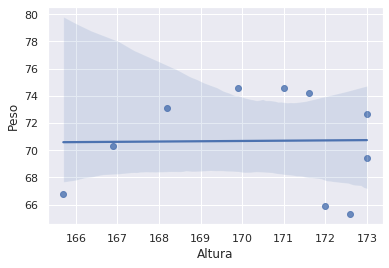

In [14]:
sns.regplot(x=peso_maior_que_65["Altura"], y=peso_maior_que_65["Peso"])
plt.show()

In [15]:
peso_maior_que_65[["Altura","Peso"]].corr()

Altura      Peso
Altura  1.000000  0.014937
Peso    0.014937  1.000000

√â importante observar que a correla√ß√£o de Pearson mede apenas a ader√™ncia dos dados √† tend√™ncia, n√£o sendo afetada pela inclina√ß√£o da reta de tend√™ncia (a n√£o ser para indicar a correla√ß√£o positiva ou negativa). Vamos ver este caso gerando uma caracter√≠stica para o √≠ndice de massa corporal:

In [0]:
peso_altura["IMC"] = peso_altura["Peso"] / (peso_altura["Altura"] * peso_altura["Altura"])

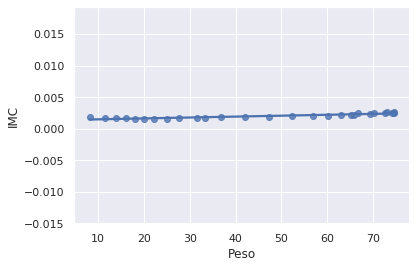

In [17]:
sns.regplot(x="Peso", y="IMC", data=peso_altura)
plt.show()

In [18]:
peso_altura[["Peso","IMC"]].cov()

Peso           IMC
Peso  544.363228  7.812458e-03
IMC     0.007812  1.300185e-07

In [19]:
peso_altura[["Peso","IMC"]].corr()

Peso       IMC
Peso  1.000000  0.928626
IMC   0.928626  1.000000

Note que, apesar de uma covari√¢ncia baixa, os dados acima apresentam uma alta correla√ß√£o. Este exemplo reflete bem a diferen√ßa entre a covari√¢ncia e a correla√ß√£o, uma vez que a covari√¢ncia foca na inclina√ß√£o da reta de tend√™ncia, enquanto a correla√ß√£o foca na ader√™ncia dos dados a esta reta. Por medir a ader√™ncia dos dados √† reta de tend√™ncia, a correla√ß√£o de Pearson √© descrita como linear. 

Em contrapartida, a correla√ß√£o de Spearman permite avaliar a ader√™ncia dos dados a tend√™ncias lineares ou n√£o. No exemplo abaixo, vemos que adotar uma medida de tend√™ncia n√£o-linear (par√¢metro `order=2` do m√©todo `regplot`) leva a uma maior ader√™ncia dos dados, o que √© refletido pela correla√ß√£o de Spearman:

In [20]:
peso_maior_que_65[["Altura","Peso"]].corr(method="spearman")

Altura      Peso
Altura  1.000000 -0.219512
Peso   -0.219512  1.000000

/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:86: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


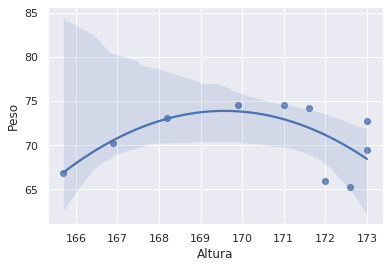

In [21]:
sns.regplot(x=peso_maior_que_65["Altura"], y=peso_maior_que_65["Peso"], order=2)
plt.show()

### Entre m√∫ltiplos pares de caracter√≠sticas

Quando trabalhamos com m√∫ltiplos pares de caracter√≠sticas, primeiro calculamos analiticamente a correla√ß√£o entre cada par, para em seguida utilizarmos visualiza√ß√µes gr√°ficas. Como visto acima, o m√©todo `corr` presente em objetos `DataFrame` permite o c√°lculo entre todos os pares de caracter√≠sticas existentes em um dataframe:

In [22]:
peso_altura.corr()

Altura      Peso  Faltam para 100kg       IMC
Altura             1.000000  0.945137          -0.945137  0.760730
Peso               0.945137  1.000000          -1.000000  0.928626
Faltam para 100kg -0.945137 -1.000000           1.000000 -0.928626
IMC                0.760730  0.928626          -0.928626  1.000000

Para melhorar a visualiza√ß√£o dos dados, podemos gerar um **mapa de calor** a partir da matriz de correla√ß√µes. Neste tipo de gr√°fico, as cores t√™m um papel fundamental no entendimento dos dados. Normalmente, cores mais frias (pr√≥ximas a branco) representam correla√ß√µes positivas, enquanto cores mais quentes (pr√≥ximas a preto) nos apontam correla√ß√µes negativas:

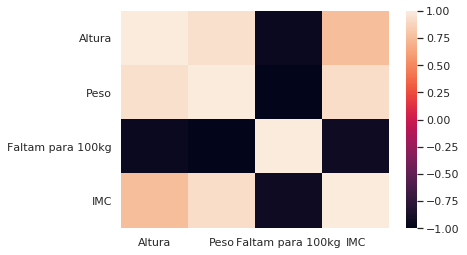

In [23]:
sns.heatmap(peso_altura.corr())
plt.show()

Podemos customizar o m√©todo `heatmap` de diferentes formas, trocando por exemplo a legenda lateral por anota√ß√µes dentro de cada c√©lula do mapa:

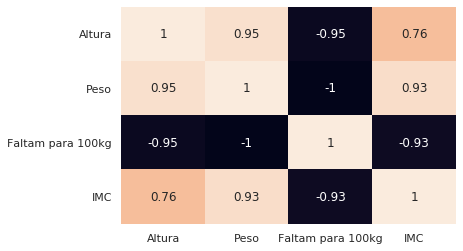

In [24]:
sns.heatmap(peso_altura.corr(), annot=True, cbar=False)
plt.show()

## Causalidade e condicionalidade

√â importante salientar que uma alta correla√ß√£o entre duas caracter√≠sticas **n√£o implica de forma alguma** que uma caracter√≠stica √© causada pela outra. De fato, √© bastante dif√≠cil investigar causalidade apenas a partir da an√°lise de um par de caracter√≠sticas.

> Esse site mostra fortes correla√ß√µes entre caracter√≠sticas, mas que possivelmente n√£o apresentam causalidade entre si https://www.tylervigen.com/spurious-correlations

Uma situa√ß√£o particular √© o caso de caracter√≠sticas condicionais. Neste caso, o dataset dispon√≠vel s√≥ apresenta dados para uma determinada caracter√≠stica quando o dado para uma outra caracter√≠stica satisfaz a determinada condi√ß√£o. 

Vamos analisar essa situa√ß√£o em um dataset sobre pre√ßos de casas do Kaggle. Para baix√°-lo, siga primeiro [a etapa 1 deste tutorial](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0), que ensina a baixar as credenciais de acesso do Kaggle (`kaggle.json`). Uma vez que voc√™ tenha baixado suas credenciais, use o menu ao lado para fazer upload do arquivo para o Colab, e execute as tr√™s c√©lulas abaixo:

In [25]:
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‚Äò/root/.kaggle‚Äô: File exists


In [26]:
!kaggle datasets download -d prevek18/ames-housing-dataset

ames-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
ames_housing = pd.read_csv("ames-housing-dataset.zip")
ames_housing.head()

Order        PID  MS SubClass  ... Sale Type  Sale Condition  SalePrice
0      1  526301100           20  ...       WD           Normal     215000
1      2  526350040           20  ...       WD           Normal     105000
2      3  526351010           20  ...       WD           Normal     172000
3      4  526353030           20  ...       WD           Normal     244000
4      5  527105010           60  ...       WD           Normal     189900

[5 rows x 82 columns]

> Caso alguma das c√©lulas acima n√£o funcione, entre em contato com os mantenedores do pandas-zero ;)

Este dataset cont√©m a descri√ß√£o de v√°rias propriedades, apresentando 82 caracter√≠sticas sobre cada propriedade. No entanto, quando um conjunto de dados apresenta um n√∫mero alto de caracter√≠sticas, √© comum que parte dessas caracter√≠sticas sejam informa√ß√µes adicionais em rela√ß√£o a outra caracter√≠stica.

No caso deste dataset, vamos filtrar apenas as caracter√≠sticas relacionadas ao termo `"Garage"`:

In [28]:
ames_garage = ames_housing.filter(like="Garage")
ames_garage.head()

Garage Type  Garage Yr Blt Garage Finish  ...  Garage Area  Garage Qual Garage Cond
0      Attchd         1960.0           Fin  ...        528.0           TA          TA
1      Attchd         1961.0           Unf  ...        730.0           TA          TA
2      Attchd         1958.0           Unf  ...        312.0           TA          TA
3      Attchd         1968.0           Fin  ...        522.0           TA          TA
4      Attchd         1997.0           Fin  ...        482.0           TA          TA

[5 rows x 7 columns]

Note que a primeira caracter√≠stica define o tipo de garagem. Esta caracter√≠stica apresenta os seguintes valores:

In [29]:
ames_garage["Garage Type"].value_counts(dropna=False)

Attchd     1731
Detchd      782
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

Um dos valores poss√≠veis para esta caracter√≠stica √© a falta deste dado (`NaN`, que identificamos passando o argumento `dropna=False` para o m√©todo `value_counts`). Quando este dado est√° em falta, as demais caracter√≠sticas deixam de fazer sentido:

In [30]:
ames_garage[ames_garage["Garage Type"].isna()]

Garage Type  Garage Yr Blt  ... Garage Qual  Garage Cond
27           NaN            NaN  ...         NaN          NaN
119          NaN            NaN  ...         NaN          NaN
125          NaN            NaN  ...         NaN          NaN
129          NaN            NaN  ...         NaN          NaN
130          NaN            NaN  ...         NaN          NaN
...          ...            ...  ...         ...          ...
2913         NaN            NaN  ...         NaN          NaN
2916         NaN            NaN  ...         NaN          NaN
2918         NaN            NaN  ...         NaN          NaN
2919         NaN            NaN  ...         NaN          NaN
2927         NaN            NaN  ...         NaN          NaN

[157 rows x 7 columns]

A forma como procedemos neste tipo de situa√ß√£o depende do contexto. Neste caso, como temos caracter√≠sticas nominais dependendo desta caracter√≠stica e um baixo n√∫mero de casos onde a caracter√≠stica original est√° ausente, a melhor alternativa √© remover estas observa√ß√µes:

In [31]:
ames_housing = ames_housing[~ames_housing["Garage Type"].isna()]
ames_housing["Garage Type"].value_counts(dropna=False)

Attchd     1731
Detchd      782
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

## Um exemplo simples de sele√ß√£o de caracter√≠sticas

A principal vantagem de analisar as rela√ß√µes entre as caracter√≠sticas presentes em seu conjunto de dados √© a possibilidade de selecionar um subconjunto de caracter√≠sticas que consegue representar a maior parte da informa√ß√£o contida no conjunto original. Pra entende o quanto isso √© necess√°rio, vamos tomar como exemplo o dataset de casas acima. Come√ßamos por um mapa de calor, para tentar avaliar se temos caracter√≠sticas redundantes:

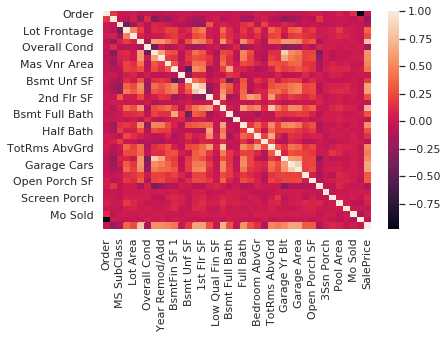

In [32]:
sns.heatmap(ames_housing.corr())
plt.show()

Note que √© bastante dif√≠cil discutir algo em rela√ß√£o a um mapa t√£o grande. Uma ferramenta √∫til neste tipo de situa√ß√£o √© o m√©todo `clustermap` da biblioteca `seaborn`, que agrupa os padr√µes observados no mapa acima.

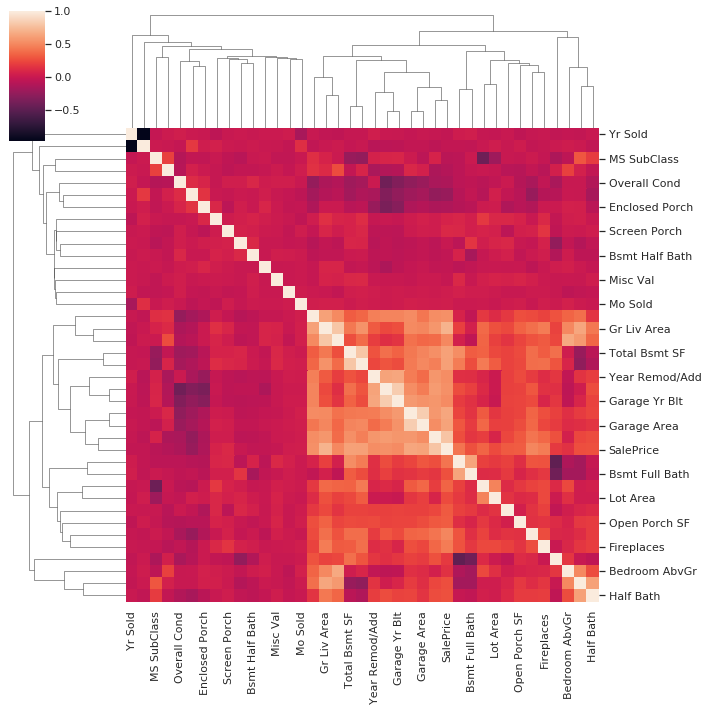

In [33]:
sns.clustermap(ames_housing.corr())
plt.show()

> Note que a visualiza√ß√£o acima inclui um dendograma, que voc√™ pode pesquisar se quiser entender melhor o conceito de **an√°lise de agrupamentos**.

Agora a visualiza√ß√£o ficou bem mais interpret√°vel que nossa primeira tentativa, mas ainda √© poss√≠vel melhor√°-la um pouco mais. Usando os par√¢metros do m√©todo `clustermap`, vamos aumentar o tamanho do gr√°fico para que os nomes de todas as caracter√≠sticas caibam na legenda (`figsize=(20,20)`) e trocar a legenda de cores pela anota√ß√£o de valores (`annot=True, fmt='.1g', cbar_pos=None`):

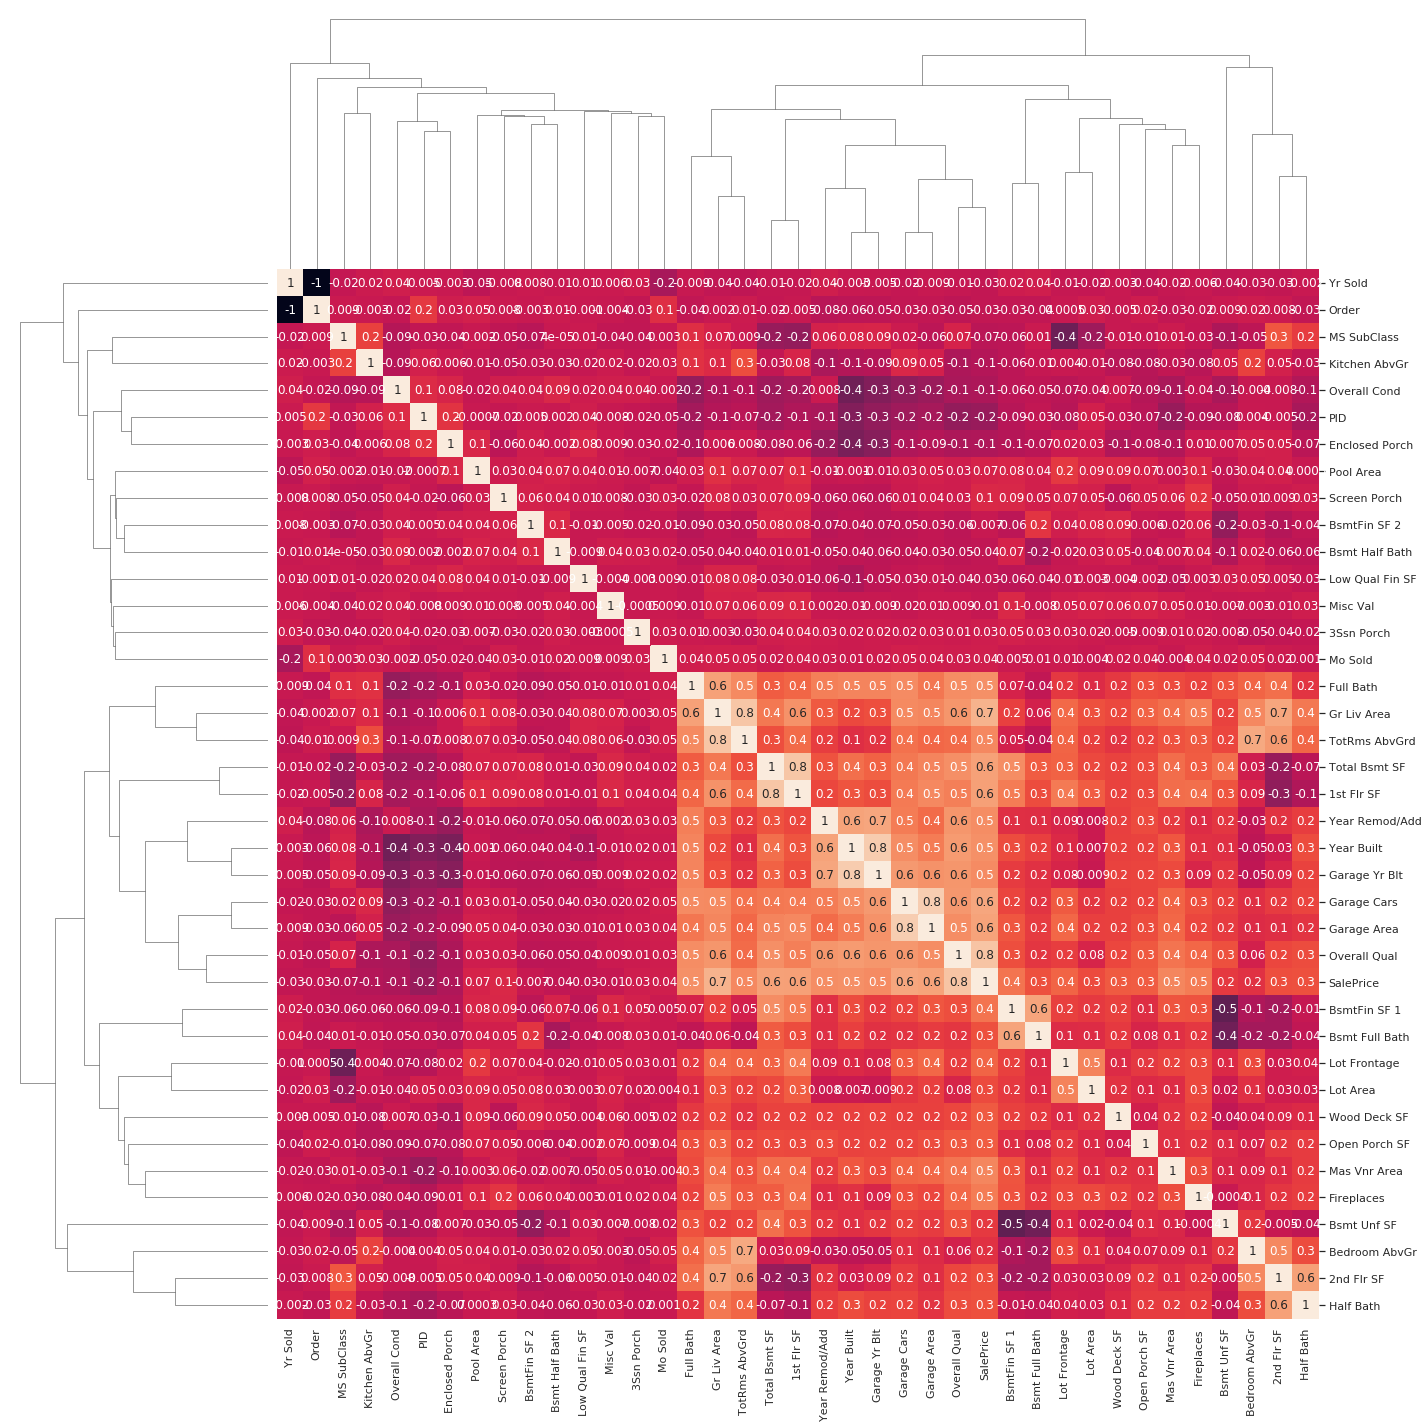

In [34]:
sns.clustermap(ames_housing.corr(), figsize=(20,20), annot=True, fmt='.1g', cbar_pos=None)
plt.show()

Para nossa an√°lise, vemos que h√° dois grandes grupos de caracter√≠sticas. O primeiro grupo, praticamente se correlaciona com caracter√≠stica alguma do dataset. Por sua vez, o segundo grupo se correlaciona fortemente com as caracter√≠sticas do pr√≥prio segundo grupo. 

A forma como podemos proceder a partir destas informa√ß√µes depende do nosso objetivo. Se nosso objetivo for prever os valores da caracter√≠stica `"SalePrice"` a partir das demais caracter√≠sticas, podemos investigar inicialmente as caracter√≠sticas mais correlacionadas a ela. Neste caso, temos `"Overall Qual"` e `"Gr Liv Area"`, respectivamente a qualidade do im√≥vel e sua √°rea habit√°vel.

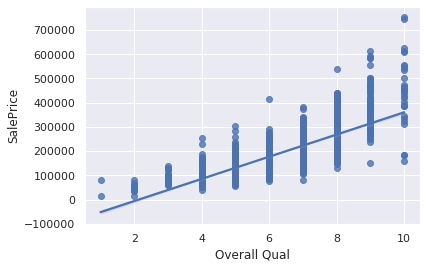

In [36]:
sns.regplot(x="Overall Qual", y="SalePrice", data=ames_housing)
plt.show()

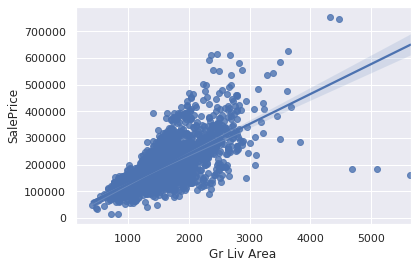

In [37]:
sns.regplot(x="Gr Liv Area", y="SalePrice", data=ames_housing)
plt.show()

Por sua vez, estas duas caracter√≠sticas t√™m forte correla√ß√£o entre si:

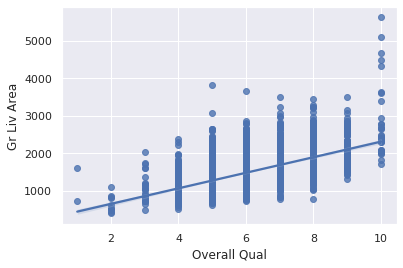

In [38]:
sns.regplot(x="Overall Qual", y="Gr Liv Area", data=ames_housing)
plt.show()

Assim, se quis√©ssemos trabalhar apenas com um conjunto reduzido de caracter√≠sticas, seria poss√≠vel escolher apenas uma dentre as duas para manter em nosso conjunto de dados. 

> Na pr√°tica da an√°lise de dados, h√° m√©todos robustos de **sele√ß√£o de caracter√≠sticas** que voc√™ tamb√©m pode pesquisar. Al√©m da correla√ß√£o, eles podem se basear em modelos estat√≠sticos e de aprendizado de m√°quina uni e multi-variados üòâ